In [2]:
import os
import numpy 
import matplotlib.pyplot as plt

In [3]:
DIM = (28,28) #these are the dimensions of the image

def load_image_files(n, path="images/"):   
    # helper file to help load the images    
    # returns a list of numpy vectors    
    images = []    
    for f in os.listdir(os.path.join(path,str(n))): # read files in the path        
        p = os.path.join(path,str(n),f)        
        if os.path.isfile(p):            
            i = numpy.loadtxt(p)            
            assert i.shape == DIM # just check the dimensions here            
            # i is loaded as a matrix, but we are going to flatten it into a single vector            
            images.append(i.flatten())    
    return images
# Load up these image files
A = load_image_files(0)
B = load_image_files(1)
N = len(A[0]) # the total size
assert N == DIM[0]*DIM[1] # just check our sizes to be sure

# set up some random initial weights
weights = numpy.random.normal(0,1,size=N)

In [3]:
# Functions that might be useful (please read the documentation)
# x.flatten() (take a N-dimensional numpy array and make it one-dimensional)
# numpy.random.choice -- choose from the list of images
# numpy.dot -- compute the dot product
# numpy.random.normal -- set up random initial weights

# Question 1:

In [4]:
import random
import numpy as np

In [7]:
np.concatenate?

In [5]:
zeros_and_ones = np.concatenate((A, B))
zeros = [0]*len(A)
ones= [1]*len(B)
sim = np.concatenate((zeros, ones))
assert len(zeros_and_ones)==len(sim)

overall_accuracy = []
sample_size = 25
num_trials = 1000

for n in range(num_trials):
    index = np.random.randint(0, len(sim)-1, 25)
    correct = 0
    for i in index:
        y = np.dot(weights, zeros_and_ones[i])
        if y<0:
            guess=0
        if y>=0:
            guess=1
        if guess==0 and sim[i]==1:
            weights+=zeros_and_ones[i]
        elif guess==1 and sim[i]==0:
            weights-=zeros_and_ones[i]
        else:
            correct+=1
    accuracy = correct/25
    overall_accuracy+=[accuracy]


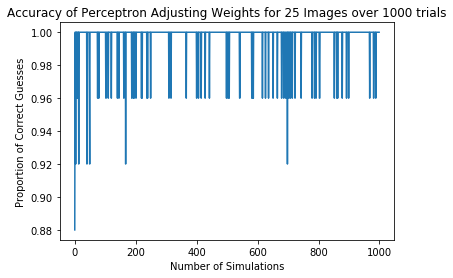

In [6]:
plt.plot(overall_accuracy)
plt.title('Accuracy of Perceptron Adjusting Weights for 25 Images over 1000 trials')
plt.xlabel('Number of Simulations')
plt.ylabel('Proportion of Correct Guesses');

# Question 2:

My solution in Question 1 does not seem to converge on 100% accuracy-- there are still oscillations meaning the algorithm was unable to determine a 100% accurate line that separates the 0 and 1 image categories.  This implies that "0" and "1"are not linearly separable on this feature space. 

# Question 3: 

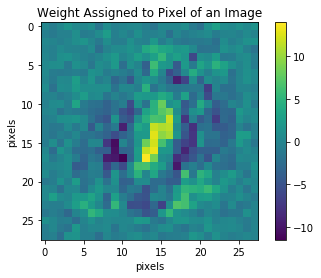

In [7]:
adj_weights = weights.reshape(28, 28)
plt.imshow(adj_weights)
plt.title('Weight Assigned to Pixel of an Image')
plt.xlabel('pixels')
plt.ylabel('pixels')
plt.colorbar();

This matrix shows the "wi"'s that the perceptron learning algorithm learned after 1000 simulations categorizing 25 images as either 0 or 1. This was the final array after adjustments were made based on the algorithm's guess and corresponding accuracy to the classifaciton of the input image. The perceptron seems to have placed the greatest importance (most extreme weights) on pixels near the center of the image or those in a ring around the center, which makes sense considering the images tended to have ink corresponding to a number centered in the middle of the input image and 1's would have filled in pixels in the middles while 0's would have pixels filled in in the shape of a circle around but not on the center of the image. Thus, negative weights correspond to pixels that, if filled in, strongly correlate to zero images while highly positive weights correspond to pixels that, if filled in, strongly correlate to 1 images. 

# Question 4:

In [98]:
type?

In [8]:
def perception(zeros_and_ones, sim, weights, sample_size):
    index=np.random.randint(0, len(sim)-1, sample_size)
    correct=0
    for i in index:
        y=np.dot(weights, zeros_and_ones[i])
        if y>=0:
            guess=1
        if y<0:
            guess=0
        if guess==sim[i]:
            correct+=1
    return correct/sample_size

In [9]:
def replace(weights, n):
    new_w = weights.copy()
    function=np.vectorize(abs)
    thresh = (N-1)-function(weights).argsort()
    
    for s in range(len(weights)):
        if thresh[s]<n:
            new_w[s]=0
    return new_w

In [10]:
num = [n*10 for n in range(1,79)]
acc = [perception(zeros_and_ones, sim, replace(weights, n), 1000) for n in num]

Text(0.5, 0, 'Number of Zeroes in Weight Vector')

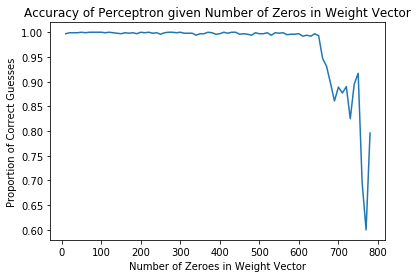

In [11]:
plt.plot(num, acc)
plt.title('Accuracy of Perceptron given Number of Zeros in Weight Vector')
plt.ylabel('Proportion of Correct Guesses')
plt.xlabel('Number of Zeroes in Weight Vector')

# Question 5:

In [6]:
# A, B are already loaded 
C= load_image_files(2)
D = load_image_files(3)
E= load_image_files(4)
F= load_image_files(5)
G= load_image_files(6)
H= load_image_files(7)
I= load_image_files(8)
J = load_image_files(9)

all_digits = [A, B, C, D, E, F, G, H, I, J]

In [10]:
def binomial_perceptron(cat1, cat2, digits, correct_answers, weights):
    correct=0
    for i in range(len(digits)):
        y=np.dot(weights, digits[i])
        if y>=0:
            guess=cat2
        if y<0:
            guess=cat1
        if guess==correct_answers[i]:
            correct+=1
    return correct/len(digits)

In [11]:
def learning(cat1, cat2, num_trials=10000):
    w_copy=np.random.normal(0, 1, size=N)
    digits = np.concatenate((all_digits[cat1], all_digits[cat2]))
    correct_answers= np.concatenate((cat1 * np.ones(len(all_digits[cat1])), cat2 * np.ones(len(all_digits[cat2]))))
    rand_ind= np.random.randint(0, len(correct_answers)-1, num_trials)
    
    for i in rand_ind:
        y=np.dot(w_copy, digits[i])
        if y>=0:
            guess=cat2
        if y<0:
            guess=cat1
        if guess==cat2 and correct_answers[i]==cat1:
            w_copy-=digits[i]
        if guess==cat1 and correct_answers[i]==cat2:
            w_copy+= digits[i]
    return digits, correct_answers, w_copy

In [12]:
num_trials=500
overall_accuracy = np.zeros((10,10))

for n in range(10):
    for m in range(10):
        if m<n:
            overall_accuracy[n][m]=overall_accuracy[m][n]
        else:
            digits, correct_answers, w_copy = learning(n, m, 10000)
            overall_accuracy[n][m]=binomial_perceptron(n, m, digits, correct_answers, w_copy)

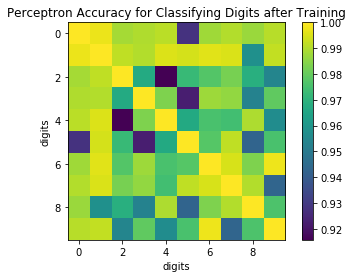

In [13]:
plt.imshow(overall_accuracy)
plt.title('Perceptron Accuracy for Classifying Digits after Training')
plt.xlabel('digits')
plt.ylabel('digits')
plt.colorbar()

This plot matches my intuition of digits that would be hard to classify because the ones it had a lower performance accuracy on are the ones that look similar to others or even as if they are composed of other digits. For example, the digit 5 had generally lower performances when compared to other digits... This makes intuitive sense because it can be seen that it shares characterisitics with 1 (straight line), zero/nine (semi circle), etc. Similarily, 8 had generally lower success for the perceptron classifying it against other digits and, like 5, it shares common features with other digits as well. 